In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#load dataframes
df_spacy = pd.read_csv('/Users/ziyanxu/Downloads/df_entities_spacy_processed.csv')
df_stanza= pd.read_csv('/Users/ziyanxu/Downloads/df_entities_stanza_processed.csv')

In [11]:
#for spacy
df_spacy_chemistry = df_spacy[df_spacy["category"] == "Chemistry"]
df_spacy_physics = df_spacy[df_spacy["category"] == "Physics"]

In [12]:
df_stanza_chemistry = df_stanza[df_stanza["category"] == "Chemistry"]
df_stanza_physics = df_stanza[df_stanza["category"] == "Physics"]

In [50]:
# Function to calculate avg/min/max number of NEs
def calculate_ne_stats(df):
    ne_counts = df.groupby('source_index')['text'].count()
    return ne_counts.agg(['mean', 'min', 'max'])

# Get statistics for spaCy
spacy_ne_stats_phy = calculate_ne_stats(df_spacy_physics)
spacy_ne_stats_che = calculate_ne_stats(df_spacy_chemistry)
spacy_word_stats_phy = df_spacy_physics['n_word'].agg(['mean', 'min', 'max'])
spacy_word_stats_che = df_spacy_chemistry['n_word'].agg(['mean', 'min', 'max'])

# Get statistics for Stanza
stanza_ne_stats_phy = calculate_ne_stats(df_stanza_physics)
stanza_ne_stats_che = calculate_ne_stats(df_stanza_chemistry)
stanza_word_stats_phy = df_stanza_physics['n_word'].agg(['mean', 'min', 'max'])
stanza_word_stats_che = df_stanza_chemistry['n_word'].agg(['mean', 'min', 'max'])

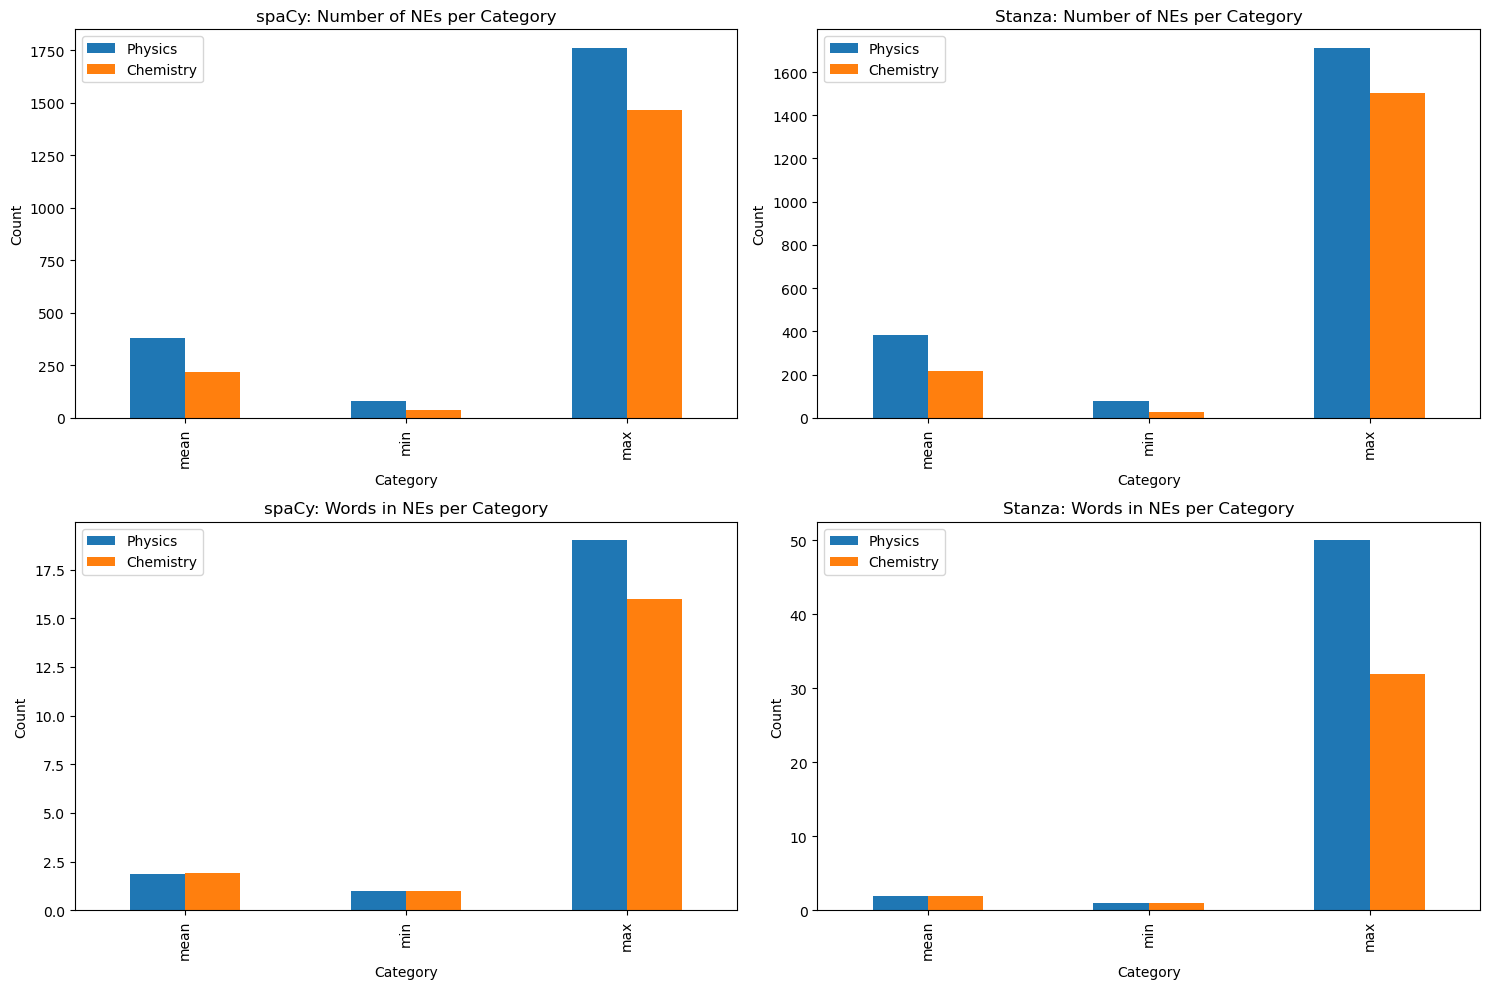

In [51]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Avg/Min/Max number of NEs per category per package
spacy_ne_stats = pd.DataFrame({
    'Physics': spacy_ne_stats_phy,
    'Chemistry': spacy_ne_stats_che
})
stanza_ne_stats = pd.DataFrame({
    'Physics': stanza_ne_stats_phy,
    'Chemistry': stanza_ne_stats_che
})

# Plot number of NEs
spacy_ne_stats.plot(kind='bar', ax=axes[0, 0], title='spaCy: Number of NEs per Category')
stanza_ne_stats.plot(kind='bar', ax=axes[0, 1], title='Stanza: Number of NEs per Category')

# Avg/Min/Max number of words in each NE per category per package
spacy_word_stats = pd.DataFrame({
    'Physics': spacy_word_stats_phy,
    'Chemistry': spacy_word_stats_che
})
stanza_word_stats = pd.DataFrame({
    'Physics': stanza_word_stats_phy,
    'Chemistry': stanza_word_stats_che
})

# Plot number of words in each NE
spacy_word_stats.plot(kind='bar', ax=axes[1, 0], title='spaCy: Words in NEs per Category')
stanza_word_stats.plot(kind='bar', ax=axes[1, 1], title='Stanza: Words in NEs per Category')

# Set plot labels
for ax in axes.flat:
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()